# Scraped Cargoes API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedCargoesAPI/Scraped%20Cargoes%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Cargoes API

The goal of Scraped Cargoes API is to collect and return scraped cargoes by the given filters or cargo IDs. This can be done by using the `ScrapedCargoesAPI` class and calling appropriate methods

#### 1. Request by filters

Cargoes can be retrieved for specific filters, by calling the `get_cargoes` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`received_date_from` Earliest date the cargo received

`received_date_to` Latest date the cargo received

`updated_date_from` Earliest date the cargo updated

`updated_date_to` Latest date the cargo updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by cargo IDs

Cargoes can be retrieved for specific cargo IDs, by calling the `get_cargoes_by_cargo_ids` method with the following argument:

#### Required

`cargo_ids` A list of cargo ids to retrieve

### Additional optional arguments

Both methods, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, in_line_order, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_laycan, scraped_load, scraped_load2, scraped_discharge, scraped_discharge_options, scraped_discharge2, scraped_charterer, scraped_cargo_type, scraped_quantity, scraped_delivery_date, scraped_delivery_from, scraped_delivery_to, 
scraped_redelivery_from, scraped_redelivery_to
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
load_name, load_taxonomy, load_name2, load_taxonomy2, discharge_name, discharge_taxonomy, discharge_name2, discharge_taxonomy2, charterer, cargo_type, cargo_type_group, delivery_from_name, delivery_from_taxonomy, delivery_to_name, delivery_to_taxonomy, redelivery_from_name, redelivery_from_taxonomy, redelivery_to_name, redelivery_to_taxonomy, charter_type, cargo_status
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for the arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_cargoes import ScrapedCargoesAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedCargoesAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedCargoesAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker cargoes received the last twelve hours, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(hours=12)

And then call `get_cargoes` method, as below

In [6]:
scraped_cargoes = api.get_cargoes(
    vessel_type = vessel_type,
    received_date_from = received_date_from,
)

next(iter(scraped_cargoes), None)

ScrapedCargo(cargo_id=21016273, message_id=26333297, parsed_part_id=41760373, line_from=19, line_to=19, in_line_order=None, source='Email', updated_date=datetime.datetime(2022, 8, 3, 21, 56, 24, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2022, 8, 3, 21, 55, 15, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_laycan='5-10/9', laycan_from=datetime.datetime(2022, 9, 5, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2022, 9, 10, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='usg', load_geo_id=24676, load_name='US Gulf', load_taxonomy_id=4, load_taxonomy='Level0', scraped_load2=None, load_geo_id2=None, load_name2=None, load_taxonomy_id2=None, load_taxonomy2=None, scraped_discharge='ta', scraped_discharge_options=None, discharge_geo_id=25025, discharge_name='Mediterranean / UK Continent', discharge_taxonomy_id=6, discharge_taxonomy='Level2', scraped_discharge2=None, discharge_geo_id2=None, discharge_name2=None, discharge_taxonomy_id2=None, d

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_cargoes)

df.head()

,cargo_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,redelivery_to_name,redelivery_to_taxonomy_id,redelivery_to_taxonomy,charter_type_id,charter_type,cargo_status_id,cargo_status,content,sender,is_private
0,21016273,26333297,41760373,19,19,NaN,Email,2022-08-03 21:56:24+00:00,2022-08-03 21:55:15+00:00,False,...,None,None,None,0,Voyage,NaN,None,bp 270 usg/ta 5-10/9,True North Chartering,True
1,21016274,26333297,41760373,14,14,NaN,Email,2022-08-03 21:56:24+00:00,2022-08-03 21:55:15+00:00,False,...,None,None,None,0,Voyage,NaN,None,csssa 270 ag/west 23-25/8,True North Chartering,True
2,21016275,26333297,41760373,16,16,NaN,Email,2022-08-03 21:56:24+00:00,2022-08-03 21:55:15+00:00,False,...,None,None,None,0,Voyage,NaN,None,sahara 130/260 waf/ukcm 12/8,True North Chartering,True
3,21016276,26333297,41760373,40,40,NaN,Email,2022-08-03 21:56:24+00:00,2022-08-03 21:55:15+00:00,False,...,None,None,None,0,Voyage,0.0,OnSubs,ampol 130 algeria/east 14-16/8 - on subs,True North Chartering,True
4,21016277,26333297,41760373,48,48,NaN,Email,2022-08-03 21:56:24+00:00,2022-08-03 21:55:15+00:00,False,...,None,None,None,0,Voyage,NaN,None,cnr 70 usg/ta 10-8,True North Chartering,True


#### Request by cargo IDs

To get data for specific cargo ID(s), you must call the `get_cargoes_by_cargo_ids` method for a list of desired cargo ID(s)

In [8]:
cargo_ids = df.sample(5, replace=True).cargo_id.tolist()  # Or add a list of your desired cargo IDs

cargo_ids

[21023757, 21023769, 21018604, 21021443, 21019715]

Date arguments are not available in `get_cargoes_by_cargo_ids` method

In [9]:
scraped_cargoes_by_ids = api.get_cargoes_by_cargo_ids(
    cargo_ids=cargo_ids,
)

df_by_ids = pd.DataFrame(scraped_cargoes_by_ids)
df_by_ids.head()

,cargo_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,redelivery_to_name,redelivery_to_taxonomy_id,redelivery_to_taxonomy,charter_type_id,charter_type,cargo_status_id,cargo_status,content,sender,is_private
0,21018604,26337671,41764117,29,29,None,Email,2022-08-04 02:33:06+00:00,2022-08-04 02:31:45+00:00,False,...,None,None,None,0,Voyage,None,None,bangchak 80nhc 18-20/08 sts nipah/thailand,Fearnleys,True
1,21019715,26339208,41765363,32,32,None,Email,2022-08-04 03:22:05+00:00,2022-08-04 03:19:19+00:00,False,...,None,None,None,0,Voyage,None,None,bp 130 nhc 11-13 / aug rastan / ukcm,Taipan Shipbrokers,True
2,21021443,26341031,41766710,46,46,None,Email,2022-08-04 04:10:57+00:00,2022-08-04 04:10:12+00:00,False,...,None,None,None,0,Voyage,None,None,atc 80fo rstan rsea 9-10 aug,Raffles Shipbrokers,True
3,21023757,26343176,41768172,53,53,None,Email,2022-08-04 05:10:09+00:00,2022-08-04 05:09:02+00:00,False,...,None,None,None,0,Voyage,None,None,tender 40000 mt vlsfo vadinar opts 21-31 aug clsd,ShipLinks,True
4,21023769,26343176,41768171,56,56,None,Email,2022-08-04 05:10:09+00:00,2022-08-04 05:09:02+00:00,False,...,None,None,None,0,Voyage,None,None,tender 40000 mt fo vadinar opts 20-24 aug clsd,ShipLinks,True


#### Usage of optional arguments

By default, all fields are returned. This is convenient in many cases, for example to compare scraped and mapped fields

In [10]:
fields_to_display = [
    'scraped_charterer',
    'charterer',
    'scraped_quantity',
    'quantity',
    'scraped_load',
    'load_name',
]

df[fields_to_display].head()

,scraped_charterer,charterer,scraped_quantity,quantity,scraped_load,load_name
0,bp,BP,270,270000.0,usg,US Gulf
1,csssa,CSSA,270,270000.0,ag,Arabian Gulf
2,sahara,Sahara Group,None,NaN,waf,Africa Atlantic Coast
3,ampol,Ampol,130,130000.0,algeria,Algeria
4,cnr,None,70,70000.0,usg,US Gulf


## Examples

Let's start by fetching all tanker cargoes received the last week

In [11]:
example_vessel_type = 1  # tanker
example_date_from = datetime.utcnow() - timedelta(days=7)

example_scraped_cargoes = api.get_cargoes(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped cargoes

The `is_deleted` property of a scraped cargo indicates whether it is valid or not. If it is set to `True`, the corresponding `cargo_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped cargoes in the following examples.

In [12]:
data = pd.DataFrame(example_scraped_cargoes)

data = data[~data.is_deleted]

data.head()

,cargo_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,redelivery_to_name,redelivery_to_taxonomy_id,redelivery_to_taxonomy,charter_type_id,charter_type,cargo_status_id,cargo_status,content,sender,is_private
0,20875170,26126674,41572406,152,152,0.0,Email,2022-07-28 10:26:47+00:00,2022-07-28 10:23:44+00:00,False,...,None,None,None,0,Voyage,NaN,None,unipec 35 12-14/aug chiba spore-opts,McQuilling,True
1,20875171,26126674,41572406,152,152,1.0,Email,2022-07-28 10:26:47+00:00,2022-07-28 10:23:44+00:00,False,...,None,None,None,0,Voyage,NaN,None,unipec 35 12-14/aug chiba spore-opts,McQuilling,True
2,20875172,26126674,41572406,156,156,NaN,Email,2022-07-28 10:26:47+00:00,2022-07-28 10:23:44+00:00,False,...,None,None,None,0,Voyage,NaN,None,petrochina hk 40 16-18/aug dalian hkg,McQuilling,True
3,20875173,26126674,41572406,197,197,1.0,Email,2022-07-28 10:26:47+00:00,2022-07-28 10:23:44+00:00,False,...,None,None,None,0,Voyage,NaN,None,vitol 30-mar go 09-10/aug korea spore-wafr,McQuilling,True
4,20875174,26126674,41572406,197,197,0.0,Email,2022-07-28 10:26:47+00:00,2022-07-28 10:23:44+00:00,False,...,None,None,None,0,Voyage,NaN,None,vitol 30-mar go 09-10/aug korea spore-wafr,McQuilling,True


#### Top 10 Charterers

In this example, we will find the top 10 Charterers, based on the number of distinct available cargoes

In [13]:
top_chrtr_ser = data[['charterer', 'laycan_from']].drop_duplicates().charterer.value_counts().head(10)

top_chrtr_df = top_chrtr_ser.to_frame(name='CargoCount').reset_index().rename(columns={'index': 'Charterer'})

top_chrtr_df

,Charterer,CargoCount
0,Vitol,17
1,BP,15
2,Unipec,14
3,Shell,14
4,ST Shipping & Transport,11
5,Repsol,11
6,CSSA,11
7,Chevron,11
8,Total,11
9,ExxonMobil,10


And display results in a bar plot

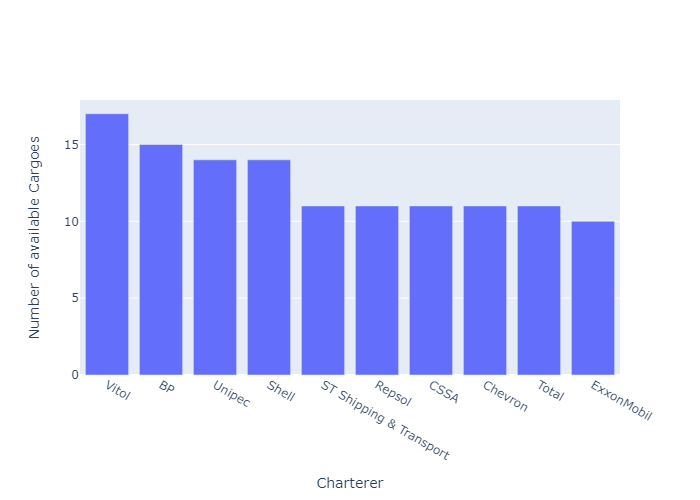

In [14]:
top_chrtr_fig = go.Figure()

bar = go.Bar(
    x=top_chrtr_df.Charterer.tolist(),
    y=top_chrtr_df.CargoCount.tolist(),
)

top_chrtr_fig.add_trace(bar)
top_chrtr_fig.update_xaxes(title_text="Charterer")
top_chrtr_fig.update_yaxes(title_text="Number of available Cargoes")
top_chrtr_fig.show()

#### Total quantity to load in specific areas per day the next week

In [15]:
areas = [
    'Arabian Gulf',
    'Africa Atlantic Coast',
    'Continent',
    'Baltic',
    'Brazil',
]

this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')

Create the pivot table

In [16]:
areas_mask = data.load_name.isin(areas) & data.laycan_from.isin(this_week_days)

df_areas = data[areas_mask]

df_pivot = pd.pivot_table(
    df_areas,
    columns='load_name',
    index='laycan_from',
    values='quantity',
    aggfunc=pd.Series.sum,
    fill_value=0,
).reindex(index=this_week_days, fill_value=0).reset_index().rename(columns={'index': 'laycan_from'})

df_pivot

load_name,laycan_from,Africa Atlantic Coast,Arabian Gulf,Baltic,Brazil,Continent
0,2022-08-04 00:00:00+00:00,0,0,60000,0,0
1,2022-08-05 00:00:00+00:00,0,120000,0,0,259000
2,2022-08-06 00:00:00+00:00,0,70000,0,0,148000
3,2022-08-07 00:00:00+00:00,0,0,0,0,0
4,2022-08-08 00:00:00+00:00,0,250000,0,0,0
5,2022-08-09 00:00:00+00:00,260000,1650000,0,0,0
6,2022-08-10 00:00:00+00:00,0,1460000,0,1300000,337000


And display the results as timeseries

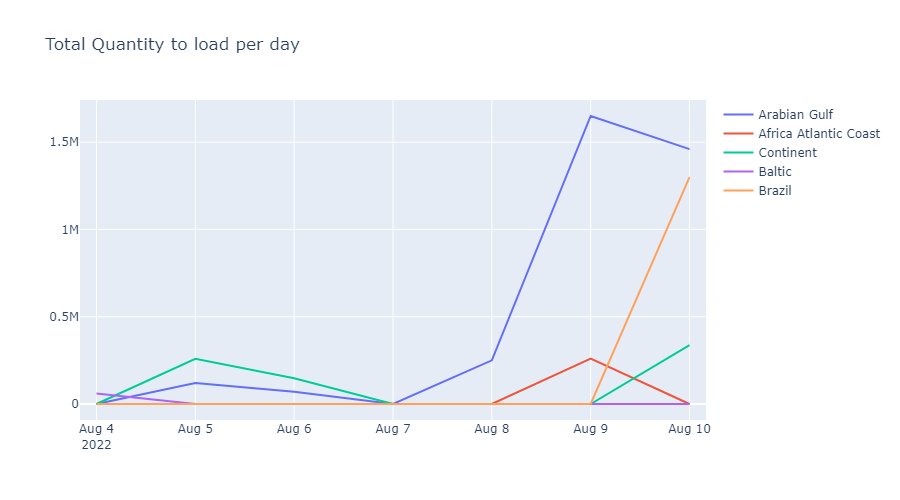

In [17]:
def area_button(area):
    args = [
        {'visible': [i == areas.index(area) for i in range(len(areas))]},
        {
            'title': f'Total Quantity to load in {area} per day',
            'showlegend': True
        },
    ]
    
    return dict(
        label=area,
        method='update',
        args=args,
    )

title = 'Total Quantity to load per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

areas_fig = go.Figure()

area_buttons = []

for area in areas:
    if area not in df_pivot.columns:
        continue
    area_scatter_plot = go.Scatter(    
        x = df_pivot.laycan_from,
        y = df_pivot[area],
        name=area,
        mode='lines',
    )

    areas_fig.add_trace(area_scatter_plot)
    
    area_buttons.append(area_button(area))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(areas))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *area_buttons,
])

areas_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

areas_fig.show()

#### Export data to csv

In [18]:
output_path = '' # Change output_path with your path
filename = 'last_week_cargoes.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)